In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline

/home/rean/projects/venv/nn/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Text(0,0.5,'relu(x), tanh(x)')

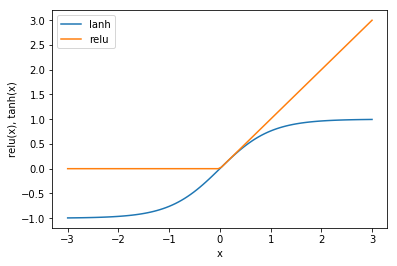

In [2]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="lanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

Text(0,0.5,'Признак 1')

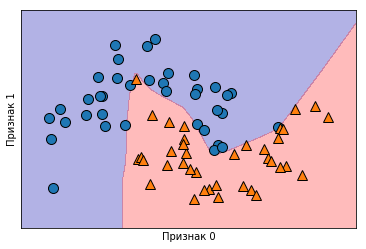

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

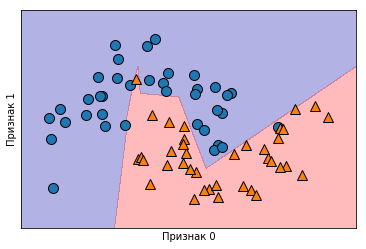

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

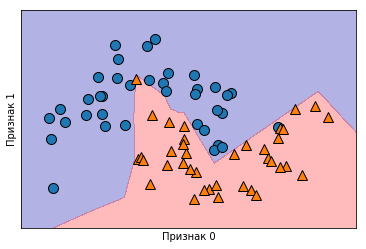

In [5]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

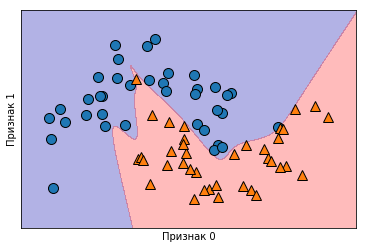

In [6]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh', hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

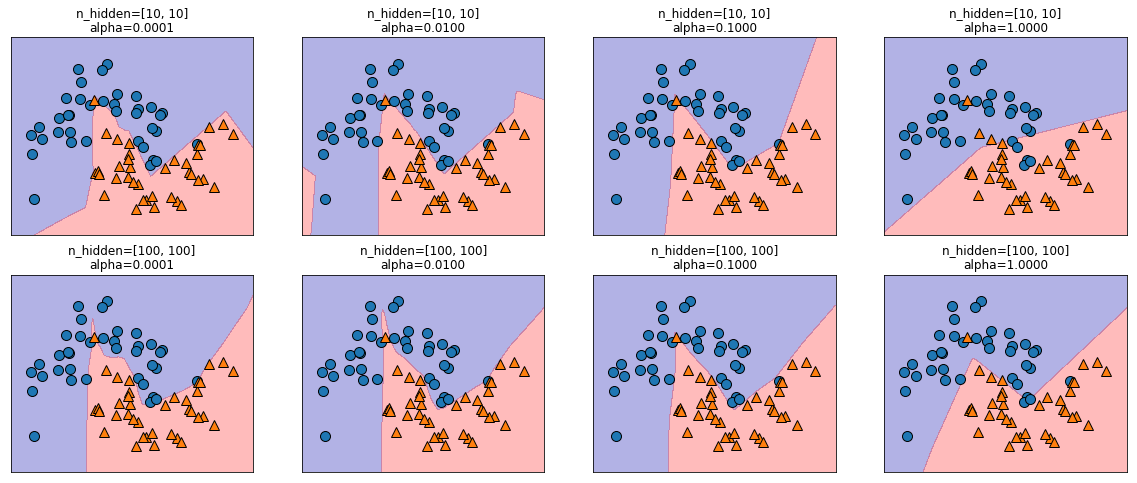

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(n_hidden_nodes, n_hidden_nodes, alpha))

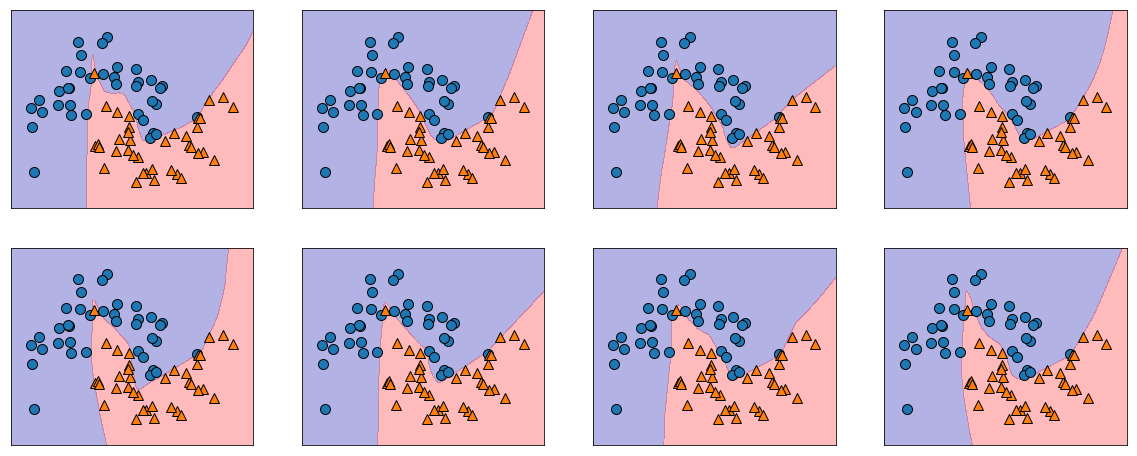

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print('Максимальные значения характеристик:\n{}'.format(cancer.data.max(axis=0)))

Максимальные значения характеристик:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.906
Правильность на тестовом наборе: 0.881


In [11]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42, max_iter=1000).fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.958


In [12]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=1).fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.979


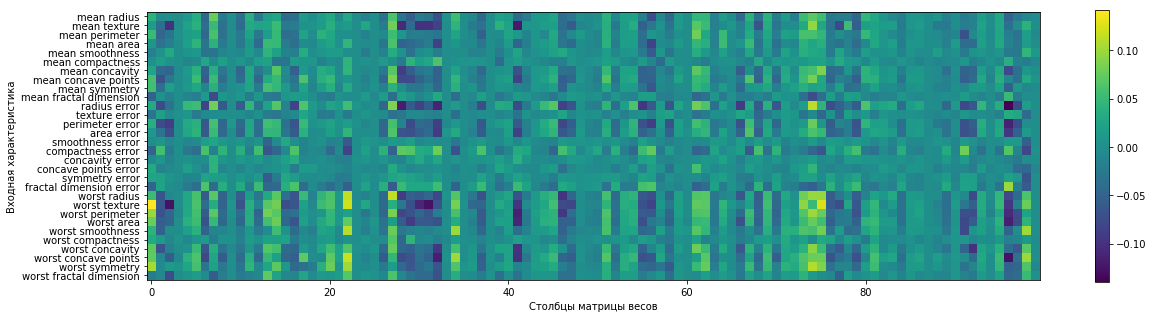

In [14]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Столбцы матрицы весов')
plt.ylabel('Входная характеристика')
plt.colorbar()